# 가상 데이터 만들기

우선 선형회귀의 학습원리를 알아보기 위해 가상의 데이터를 생성시켜보겠다.

In [1]:
import numpy as np

* 입력값 X는 표준편차가 1인 정규분포로부터 무작위로 50개를 생성시켰다.
* y = 2*X-3의 관계식에 따라 데이터가 생성된다고 가정한다.
* 실제 상황에서 위의 관계식은 알려져있지 않으며, 데이터사이언스의 목적은 숨겨져있는 위와 같은 관계식을 우 리가 확보한 데이터로부터 학습하는 것이다. 
* 하지만 현재는 이러한 관계식을 알고있다고 가정한다.

In [2]:
true_w = 2
true_b = -3
X = np.random.normal(1,size=50)

In [3]:
X

array([ 0.34471715,  1.48664732,  1.7554499 ,  1.1720066 ,  0.04735666,
        2.17363038,  0.08176512,  2.19632646,  0.67409827,  0.71057463,
        2.19431913,  2.2138628 ,  0.18743854,  0.65105655,  0.768865  ,
        2.02383561,  1.09484954,  1.8925212 ,  1.5416898 , -0.31013074,
        0.6548577 ,  1.36221303,  0.54697837, -0.79694798,  1.95556753,
        0.72202247, -0.09662863,  2.28020834,  1.50111145,  0.28089358,
        0.84542208, -0.33446408,  2.87823768, -0.3252875 ,  1.97216855,
        0.82551607,  1.84579481,  1.2006828 ,  1.09662286,  0.62309207,
        0.20013567,  2.02180078, -0.25436066, -0.15059924, -0.30974652,
        0.53393958,  0.13549018,  1.6854136 ,  1.04118085,  1.91463737])

In [4]:
y = true_w*X+true_b
y

array([-2.31056571e+00, -2.67053649e-02,  5.10899796e-01, -6.55986796e-01,
       -2.90528668e+00,  1.34726075e+00, -2.83646977e+00,  1.39265292e+00,
       -1.65180346e+00, -1.57885073e+00,  1.38863826e+00,  1.42772561e+00,
       -2.62512292e+00, -1.69788690e+00, -1.46226999e+00,  1.04767121e+00,
       -8.10300930e-01,  7.85042403e-01,  8.33796033e-02, -3.62026149e+00,
       -1.69028460e+00, -2.75573932e-01, -1.90604326e+00, -4.59389595e+00,
        9.11135051e-01, -1.55595507e+00, -3.19325725e+00,  1.56041668e+00,
        2.22290984e-03, -2.43821284e+00, -1.30915584e+00, -3.66892816e+00,
        2.75647536e+00, -3.65057500e+00,  9.44337106e-01, -1.34896786e+00,
        6.91589616e-01, -5.98634409e-01, -8.06754287e-01, -1.75381587e+00,
       -2.59972866e+00,  1.04360155e+00, -3.50872133e+00, -3.30119849e+00,
       -3.61949304e+00, -1.93212083e+00, -2.72901963e+00,  3.70827209e-01,
       -9.17638300e-01,  8.29274749e-01])

* 현재 상황에서 X와 y의 관계를 산점도로 그려보면 다음과 같은 그래프의 결과물이 출력되는 것을 확인할 수 있다. 
* X와 y의 관계식에 따라 직선 형태의 관계가 그려지는 것을 확인할 수 있다

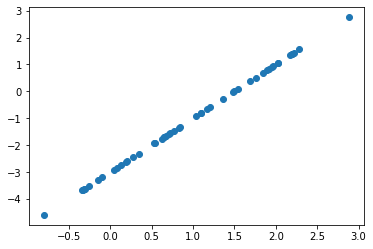

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

* y=2*X-3의 관계식에 추가적으로 일정부분의 noise를 추가한다. 
* 이 noise는 관측과정에서 혹은 데이터 생성과정에서 우리가 컨트롤 할 수 없는 랜덤한 요소를 의미한다.

In [6]:
noise = np.random.normal(0.1, size=50)
noise

array([ 1.16880294, -0.86704751, -1.11590753,  0.45403485, -0.55794462,
        0.09046731, -0.8069117 , -0.82693513,  0.52683012, -1.41076528,
        1.57165246,  1.90410051, -0.80111287, -0.60808458,  1.23302603,
        0.56310068, -1.55885642, -1.55187169, -0.14555679, -1.19867071,
        0.55241985,  0.33858742,  0.11729284,  0.43572415,  1.06775237,
        0.7567271 ,  0.09455157, -1.02321073,  1.5854803 ,  0.70512385,
       -1.40056826,  0.53135427,  1.13889092,  0.91730739, -0.19271587,
       -0.74215595, -1.03479242,  0.98824609, -3.00755287, -0.0747535 ,
       -0.74835918, -0.88469563, -0.2290001 , -1.68169346, -0.80490743,
       -0.84330748, -0.74187551,  1.27926318,  1.61631933,  0.00720117])

* 이에따라 기존의 y에 랜덤 요소를 더하게 되면, 다음과 같은 X와 y사이의 관계를 얻을수 있다. 
* 실제 세계에서 우리는 다음과 같은 데이터를 확보할 수 있을 것이며, 우리의 목적은 주어진 데이터를 이용하여 정답 즉, y=2X-3의 관계식을 잘 추론할 수 있어야 할 것이다.

In [7]:
y = y + noise

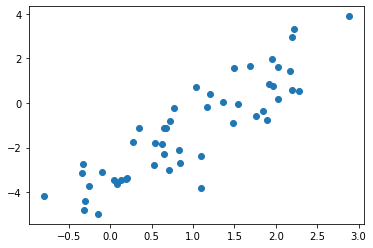

In [8]:
plt.scatter(X,y)

## 선형회귀 학습하기

* 파이썬에서 선형회귀 모형을 학습하기 위해서는 sklearn.linear_model안에 들어있는 LinearRegression을 사용하면 된다. 
* sklearn.linear_model 내부에는 LinearRegression과 LogisticRegression 등 선형모형에 관련된 다양한 모델들이 존재한다.


In [9]:
from sklearn.linear_model import LinearRegression

* 사용법은 매우 간단하다 LinearRegression 객체를 불러서 이를 사용하면 된다.
* 실제 사용하기 전에 sklearn에서 제공하는 LienarRegression API를 읽어보길 권장한다.
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.34471715  1.48664732  1.7554499   1.1720066   0.04735666  2.17363038
  0.08176512  2.19632646  0.67409827  0.71057463  2.19431913  2.2138628
  0.18743854  0.65105655  0.768865    2.02383561  1.09484954  1.8925212
  1.5416898  -0.31013074  0.6548577   1.36221303  0.54697837 -0.79694798
  1.95556753  0.72202247 -0.09662863  2.28020834  1.50111145  0.28089358
  0.84542208 -0.33446408  2.87823768 -0.3252875   1.97216855  0.82551607
  1.84579481  1.2006828   1.09662286  0.62309207  0.20013567  2.02180078
 -0.25436066 -0.15059924 -0.30974652  0.53393958  0.13549018  1.6854136
  1.04118085  1.91463737].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

* 현재 상황에서 reg.fit()명령어를 이용하여 학습하면 에러가나는데 그 이유는 X벡터가 1차원 벡터로 주어져 있기 때문이다. (현재의 차원 1차원, n개의 벡터)
* 1차원인 종속변수와 달리 머신러닝 상황에서 대부분의 데이터는 matrix형태, 즉 2차원의 형태를 갖는다. 따라서 현재 독립변수가 1개의 feature로 구성되어 있다 하더라도 이를 2차원의 형태로 바꾸어주어야 한다. (즉 2차원, nxp 형태로 바꾸어주어야 한다)
* 이를 위해 numpy에서 제공하는 reshape를 수행한다.
* reshape(-1,1)이라고 하면 뒤의 열은 1열로 하고 앞의 -1부분은 알아서 맞추라는 뜻이다. 따라서 데이터의 갯수인 n개가 자동으로 맞추어지게 된다.

In [12]:
X=X.reshape(-1,1)

* 이제 학습할 준비가 끝났다.

In [13]:
reg.fit(X,y)

LinearRegression()

* 학습이 완료되고 선형회귀 객체에 저장되어있는 학습된 패러미터를 확인해보자.

In [15]:
reg.coef_, reg.intercept_

(array([2.17797653]), -3.2778513660843487)

* 우리가 생성시켰던 계수를 얼추 맞추는 것을 확인할수 있다. 데이터 생성시 발생한 랜덤한 요소로 인하여 완벽하게 데이터를 맞추지는 못하였음을 확인할 수 있다.

## 학습된 모형을 이용한 예측

In [16]:
y_pred = reg.predict(X)

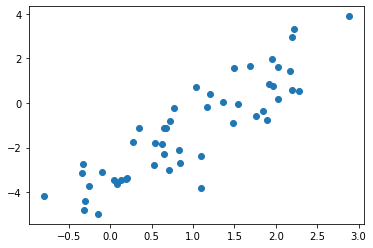

In [18]:
plt.scatter(X,y)

In [27]:
y_pred=reg.predict(X)
y_pred

array([-2.52706551, -0.0399684 ,  0.54547731, -0.7252485 , -3.17470967,
        1.45626457, -3.09976886,  1.50569611, -1.80968116, -1.73023649,
        1.50132419,  1.54388986, -2.86961462, -1.85986548, -1.60328144,
        1.13001508, -0.89329478,  0.84401539,  0.07991284, -3.95330885,
       -1.85158666, -0.31098335, -2.08654531, -5.01358535,  0.9813288 ,
       -1.70530338, -3.48830625,  1.68838888, -0.00846585, -2.66607174,
       -1.43654192, -4.00630628,  2.99088275, -3.98631991,  1.01748545,
       -1.47989674,  0.7422464 , -0.66279242, -0.88943252, -1.92077147,
       -2.84196058,  1.12558327, -3.83184292, -3.60585298, -3.95247202,
       -2.11494348, -2.98275692,  0.3929399 , -1.01018391,  0.89218389])

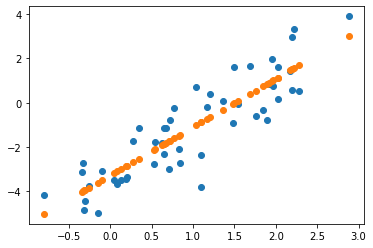

In [28]:
plt.scatter(X,y)
plt.scatter(X,y_pred)

## 새로운 데이터에 대한 예측

In [30]:
# 새로운 데이터
x2=np.linspace(-3,3,50)

In [32]:
y2_pred = reg.predict(np.linspace(-3,3,50).reshape(-1,1))

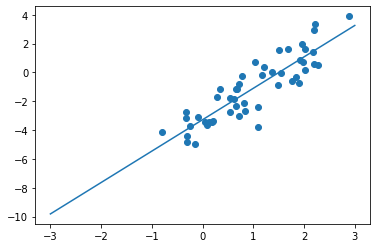

In [34]:
plt.scatter(X,y)
plt.plot(x2,y2_pred)